In [2]:
import os
from obspy import read
from datetime import datetime, timedelta
import requests
from io import BytesIO
import zipfile

# URL for seismic waveform data in SAC.zip format
base_url = "http://service.iris.edu/fdsnws/dataselect/1/query?net=TX&sta=PB28&cha=HHZ&format=sac.zip"

# Specify the directory on the desktop
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop', 'seismic_data')

# Create the directory if it doesn't exist
os.makedirs(desktop_path, exist_ok=True)

# Loop to download multiple files with different start and end times
for i in range(5):
    # Calculate start and end times for each iteration (5-hour interval)
    start_time = datetime(2023, 6, 1, i * 2, 0, 0)
    end_time = start_time + timedelta(hours=5)

    # Format start and end times in the required string format
    start_time_str = start_time.strftime("%Y-%m-%dT%H:%M:%S")
    end_time_str = end_time.strftime("%Y-%m-%dT%H:%M:%S")

    # Construct the URL for the current iteration
    url = f"{base_url}&start={start_time_str}&end={end_time_str}"

    # Send HTTP request to get the SAC.zip file
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Unzip the content directly without saving the intermediate ZIP file
        with zipfile.ZipFile(BytesIO(response.content), 'r') as zip_ref:
            zip_ref.extractall(desktop_path)

        print(f"Downloaded and extracted files for iteration {i + 1}")

    else:
        # Print an error message if the request was not successful
        print(f"Failed to retrieve data for iteration {i + 1}. Status code: {response.status_code}")





Downloaded and extracted files for iteration 1
Downloaded and extracted files for iteration 2
Downloaded and extracted files for iteration 3
Downloaded and extracted files for iteration 4
Downloaded and extracted files for iteration 5


Information for SAC file: TX.PB28.00.HHZ.M.2023.152.020000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T02:00:00.000000Z - 2023-06-01T07:00:00.000000Z | 100.0 Hz, 1800001 samples


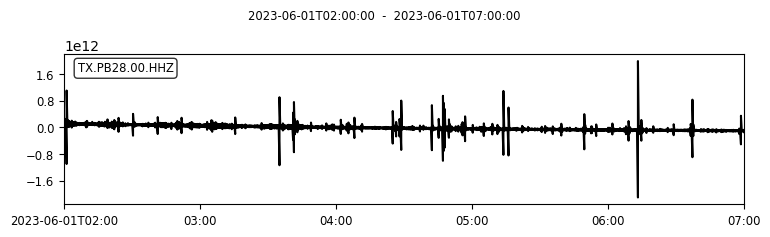

Information for SAC file: TX.PB28.00.HHZ.M.2023.152.000000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T00:00:00.000000Z - 2023-06-01T05:00:00.000000Z | 100.0 Hz, 1800001 samples


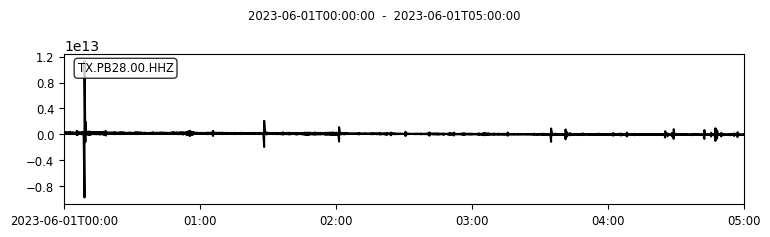

Information for SAC file: TX.PB28.00.HHZ.M.2023.152.080000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T08:00:00.000000Z - 2023-06-01T13:00:00.000000Z | 100.0 Hz, 1800001 samples


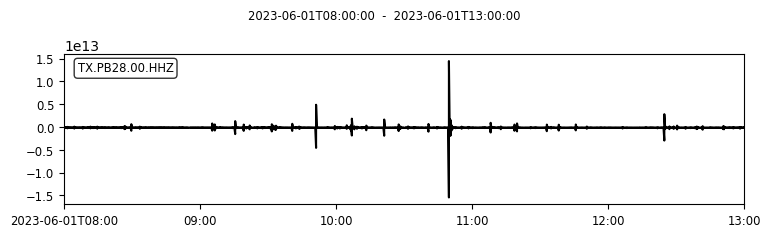

Information for SAC file: TX.PB28.00.HHZ.M.2023.152.040000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T04:00:00.000000Z - 2023-06-01T09:00:00.000000Z | 100.0 Hz, 1800001 samples


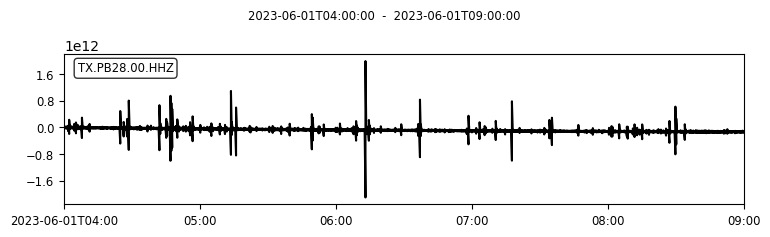

Information for SAC file: TX.PB28.00.HHZ.M.2023.152.060000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T06:00:00.000000Z - 2023-06-01T11:00:00.000000Z | 100.0 Hz, 1800001 samples


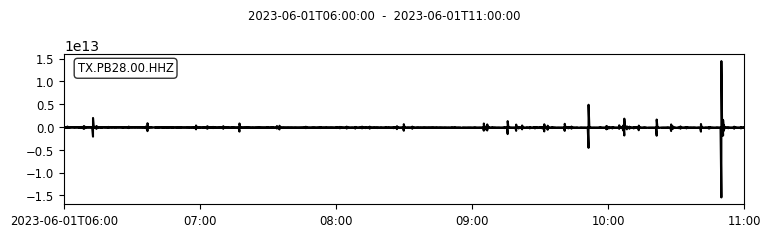

In [3]:
import os
from obspy import read
import matplotlib.pyplot as plt

# Specify the directory on the desktop
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop', 'seismic_data')

# Get the list of files in the directory
files = os.listdir(desktop_path)

# Filter for SAC files
sac_files = [file for file in files if file.endswith('.SAC')]

# Loop through each SAC file, read, and plot
for sac_file in sac_files:
    # Construct the full path to the SAC file
    full_path = os.path.join(desktop_path, sac_file)

    # Read the SAC file using ObsPy
    st = read(full_path, format='sac')

    # Print basic information about the seismic trace
    print(f"Information for SAC file: {sac_file}")
    print(st)

    # Plot the seismic trace
    st.plot()

    # Show the plot
    plt.show()

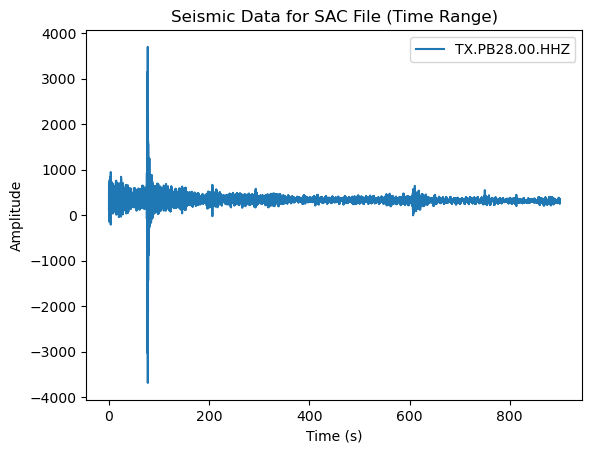

In [24]:
import obspy
import matplotlib.pyplot as plt
from obspy import UTCDateTime

# Load the SAC file
sac_file = "/Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.020000.SAC"
stream = obspy.read(sac_file)

# Extract relevant information
trace = stream[0]
start_time = UTCDateTime("2023-06-01T00:00:00.000000")
end_time = UTCDateTime("2023-06-01T02:15:00.000000")

# Filter the data within the specified time range
trace.trim(starttime=start_time, endtime=end_time)

# Plot the seismic data within the specified time range

plt.plot(trace.times(), trace.data, label=trace.id)
plt.title('Seismic Data for SAC File (Time Range)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()



2023-06-01T02:01:00.000000Z 2023-06-01T02:02:00.000000Z
Information for SAC file: /Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.020000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T02:01:00.000000Z - 2023-06-01T02:02:00.000000Z | 100.0 Hz, 6001 samples


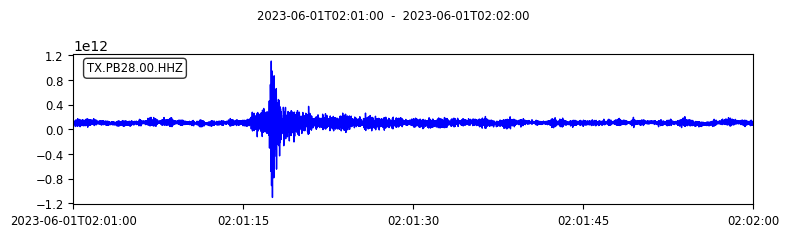

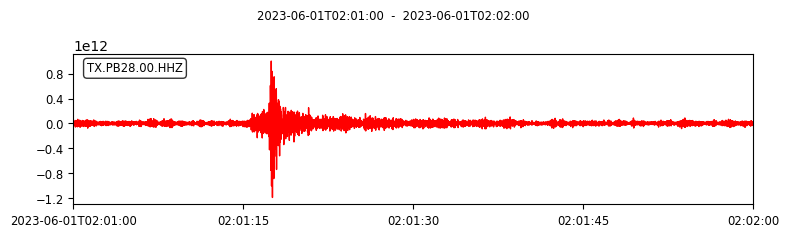

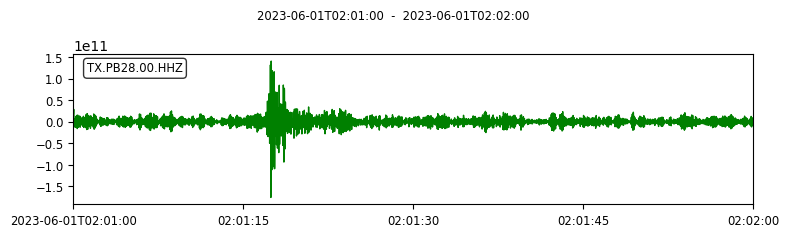

In [50]:
import obspy
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.signal.filter import highpass, lowpass

# Load the SAC file
sac_file = "/Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.020000.SAC"
stream = obspy.read(sac_file)


# Extract relevant information
trace = stream[0]
start_time = UTCDateTime("2023-06-01T02:01:00.000000")
end_time = UTCDateTime("2023-06-01T02:02:00.000000")

# Trim the data within the specified time range
trace.trim(starttime=start_time, endtime=end_time)
print(start_time, end_time)
# Print basic information about the seismic trace
print(f"Information for SAC file: {sac_file}")
print(stream)

# Plot the original seismic trace
stream.plot(title=f"Original Seismic Trace - {sac_file}", color='blue', number_of_ticks=5)

# Apply high-pass filter at 5 Hz to each trace in the stream
for tr in stream:
    tr.data = highpass(tr.data, freq=5, df=tr.stats.sampling_rate, corners=2, zerophase=True)

# Plot the seismic trace after applying the high-pass filter
stream.plot(title=f"High-pass Filtered Seismic Trace - {sac_file}", color='red', number_of_ticks=5)

# Apply low-pass filter at 10 Hz to each trace in the stream
for tr in stream:
    tr.data = lowpass(tr.data, freq=10, df=tr.stats.sampling_rate, corners=2, zerophase=True)

# Plot the seismic trace after applying the low-pass filter
stream.plot(title=f"Low-pass Filtered Seismic Trace - {sac_file}", color='green', number_of_ticks=5)

# Show the plots
plt.show()


Information for SAC file: TX.PB28.00.HHZ.M.2023.152.020000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T02:00:00.000000Z - 2023-06-01T07:00:00.000000Z | 100.0 Hz, 1800001 samples


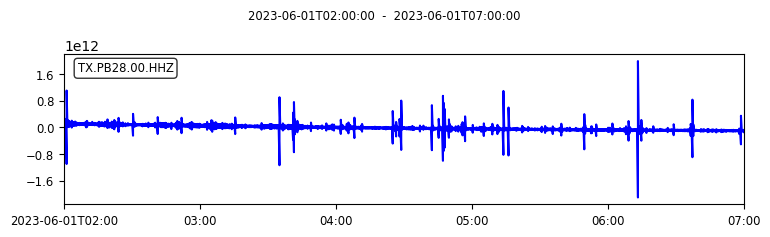

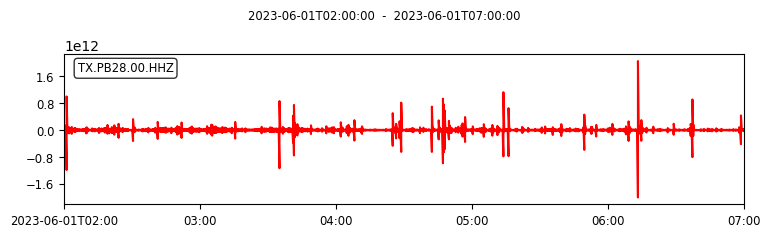

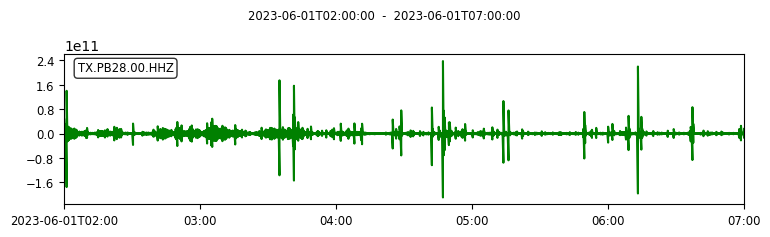

Information for SAC file: TX.PB28.00.HHZ.M.2023.152.000000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T00:00:00.000000Z - 2023-06-01T05:00:00.000000Z | 100.0 Hz, 1800001 samples


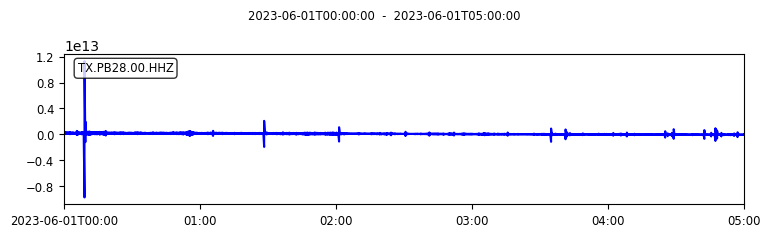

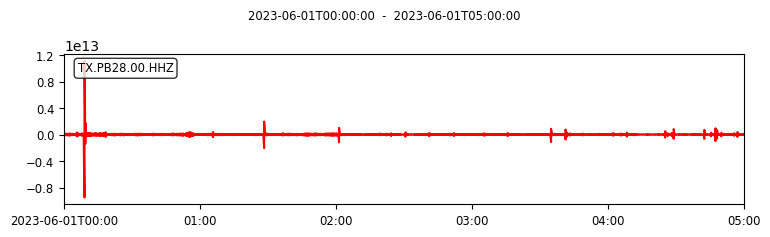

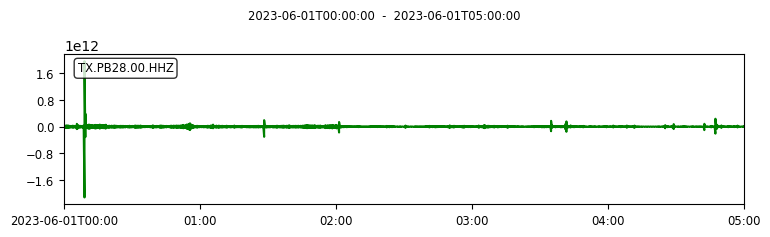

Information for SAC file: TX.PB28.00.HHZ.M.2023.152.080000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T08:00:00.000000Z - 2023-06-01T13:00:00.000000Z | 100.0 Hz, 1800001 samples


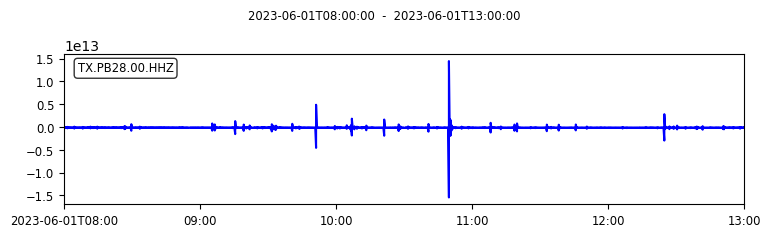

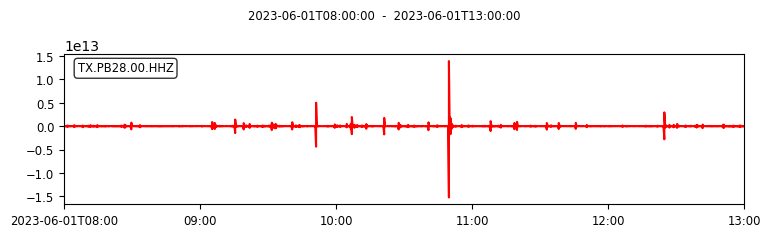

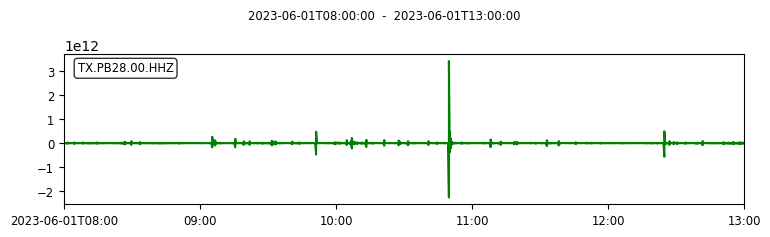

Information for SAC file: TX.PB28.00.HHZ.M.2023.152.040000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T04:00:00.000000Z - 2023-06-01T09:00:00.000000Z | 100.0 Hz, 1800001 samples


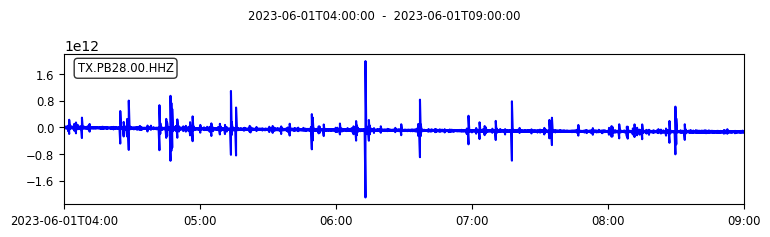

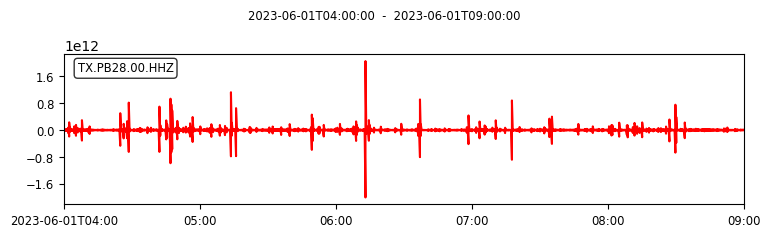

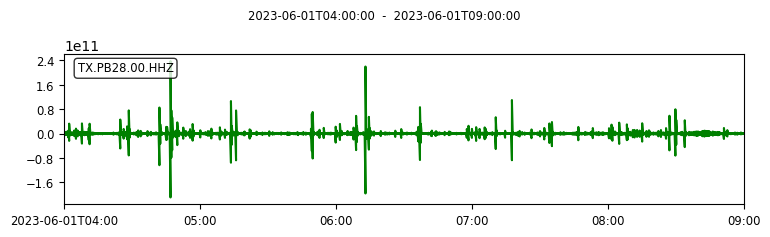

Information for SAC file: TX.PB28.00.HHZ.M.2023.152.060000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T06:00:00.000000Z - 2023-06-01T11:00:00.000000Z | 100.0 Hz, 1800001 samples


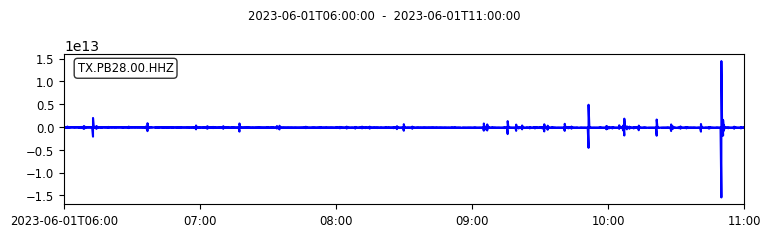

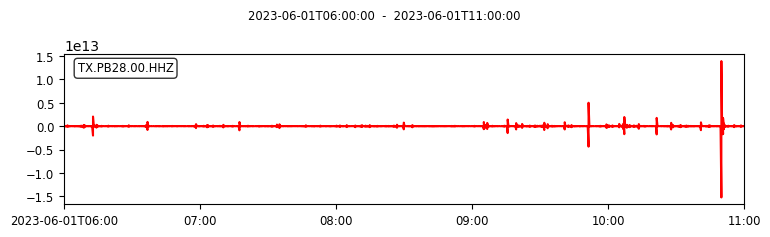

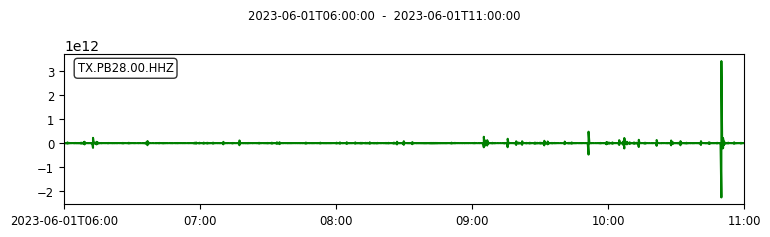

In [31]:
import os
from obspy import read, Trace
from obspy.signal.filter import highpass, lowpass
import matplotlib.pyplot as plt

# Specify the directory on the desktop
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop', 'seismic_data')

# Get the list of files in the directory
files = os.listdir(desktop_path)

# Filter for SAC files
sac_files = [file for file in files if file.endswith('.SAC')]

# Loop through each SAC file, read, plot, and apply high-pass and low-pass filters
for sac_file in sac_files:
    # Construct the full path to the SAC file
    full_path = os.path.join(desktop_path, sac_file)

    # Read the SAC file using ObsPy
    st = read(full_path, format='sac')

    # Print basic information about the seismic trace
    print(f"Information for SAC file: {sac_file}")
    print(st)

    # Plot the original seismic trace
    st.plot(title=f"Original Seismic Trace - {sac_file}", color='blue', number_of_ticks=5)

    # Apply high-pass filter at 20 Hz to each trace in the stream
    for tr in st:
        tr.data = highpass(tr.data, freq=5, df=tr.stats.sampling_rate, corners=2, zerophase=True)

    # Plot the seismic trace after applying the high-pass filter
    st.plot(title=f"High-pass Filtered Seismic Trace - {sac_file}", color='red', number_of_ticks=5)

    # Apply low-pass filter at 2 Hz to each trace in the stream
    for tr in st:
        tr.data = lowpass(tr.data, freq=10, df=tr.stats.sampling_rate, corners=2, zerophase=True)

    # Plot the seismic trace after applying the low-pass filter
    st.plot(title=f"Low-pass Filtered Seismic Trace - {sac_file}", color='green', number_of_ticks=5)

    # Show the plots
    plt.show()


2023-06-01T02:01:00.000000Z 2023-06-01T02:02:00.000000Z
Information for SAC file: /Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.020000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T02:01:00.000000Z - 2023-06-01T02:02:00.000000Z | 100.0 Hz, 6001 samples


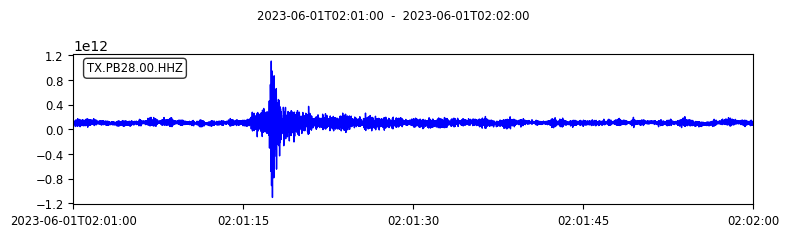

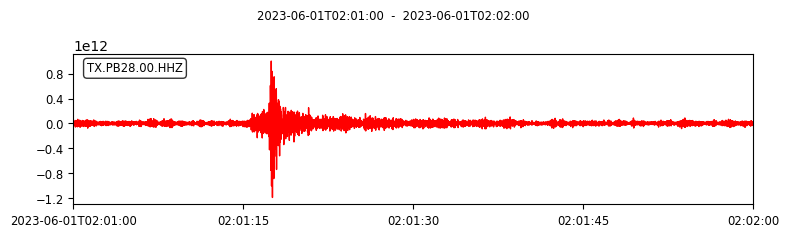

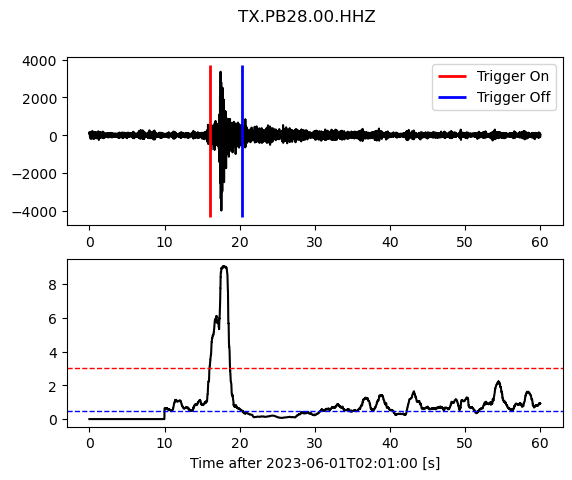

In [82]:
import obspy
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.signal.filter import highpass, lowpass
from obspy.signal.trigger import classic_sta_lta
from obspy.signal.trigger import plot_trigger

# Load the SAC file
sac_file = "/Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.020000.SAC"
stream = obspy.read(sac_file)

# Extract relevant information
trace = stream[0]
start_time = UTCDateTime("2023-06-01T02:01:00.000000")
end_time = UTCDateTime("2023-06-01T02:02:00.000000")

# Trim the data within the specified time range
trace.trim(starttime=start_time, endtime=end_time)
print(start_time, end_time)

# Print basic information about the seismic trace
print(f"Information for SAC file: {sac_file}")
print(stream)

# Plot the original seismic trace
stream.plot(title=f"Original Seismic Trace - {sac_file}", color='blue', number_of_ticks=5)

# Apply high-pass filter at 5 Hz to each trace in the stream
for tr in stream:
    tr.data = highpass(tr.data, freq=5, df=tr.stats.sampling_rate, corners=2, zerophase=True)

# Plot the high-pass filtered seismic trace
stream.plot(title=f"High-pass Filtered Seismic Trace - {sac_file}", color='red', number_of_ticks=5)

# Earthquake detection on the high-pass filtered data
cft = classic_sta_lta(trace.data, int(1 * trace.stats.sampling_rate), int(10 * trace.stats.sampling_rate))
plot_trigger(trace, cft, 3, 0.5)

# Show the plots
plt.show()


2023-06-01T04:00:00.000000Z 2023-06-01T05:00:00.000000Z
Information for SAC file: /Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.020000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T04:00:00.000000Z - 2023-06-01T05:00:00.000000Z | 100.0 Hz, 360001 samples
Number of triggers detected: 54


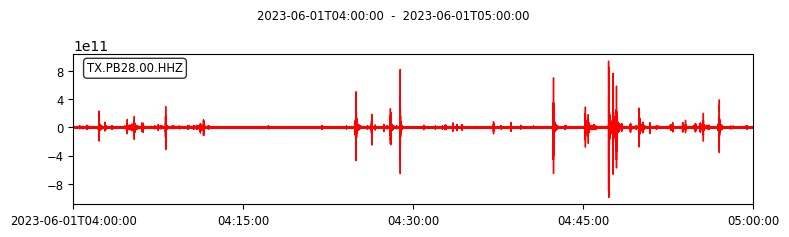

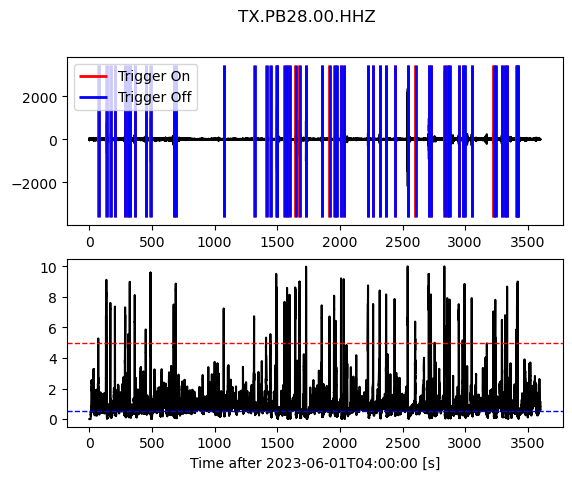

In [106]:
import obspy
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.signal.filter import highpass
from obspy.signal.trigger import classic_sta_lta, trigger_onset

# Load the SAC file
sac_file = "/Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.020000.SAC"
stream = obspy.read(sac_file)

# Extract relevant information
trace = stream[0]
start_time = UTCDateTime("2023-06-01T04:00:00.000000")
end_time = UTCDateTime("2023-06-01T05:00:0.000000")

# Trim the data within the specified time range
trace.trim(starttime=start_time, endtime=end_time)
print(start_time, end_time)

# Print basic information about the seismic trace
print(f"Information for SAC file: {sac_file}")
print(stream)

# Apply high-pass filter at 5 Hz to each trace in the stream
for tr in stream:
    tr.data = highpass(tr.data, freq=5, df=tr.stats.sampling_rate, corners=2, zerophase=True)

# Earthquake detection on the high-pass filtered data
cft = classic_sta_lta(trace.data, int(1 * trace.stats.sampling_rate), int(10 * trace.stats.sampling_rate))

# Set trigger levels
onset_trigger = 5
end_trigger = 0.5

# Get trigger onsets
onset_times = trigger_onset(cft, onset_trigger, end_trigger)

# Print the count of triggers
print(f"Number of triggers detected: {len(onset_times)}")

# Plot the high-pass filtered seismic trace
trace.plot(title=f"High-pass Filtered Seismic Trace - {sac_file}", color='red', number_of_ticks=5)

# Earthquake detection on the high-pass filtered data
cft = classic_sta_lta(trace.data, int(1 * trace.stats.sampling_rate), int(10 * trace.stats.sampling_rate))
plot_trigger(trace, cft, onset_trigger, end_trigger)

# Show the plots
plt.show()

# Show the plots
plt.show()


Information for SAC file: /Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.020000.SAC
TX.PB28.00.HHZ | 2023-06-01T04:00:00.000000Z - 2023-06-01T04:10:00.000000Z | 100.0 Hz, 60001 samples
Number of triggers detected: 10


<Figure size 1200x600 with 0 Axes>

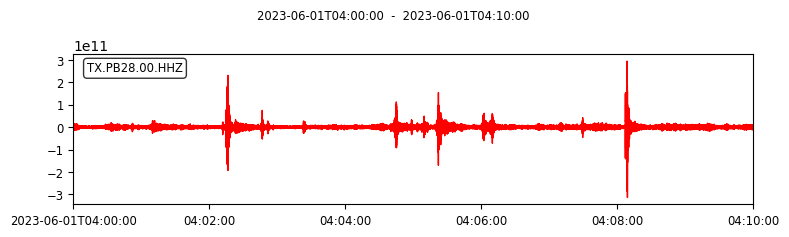

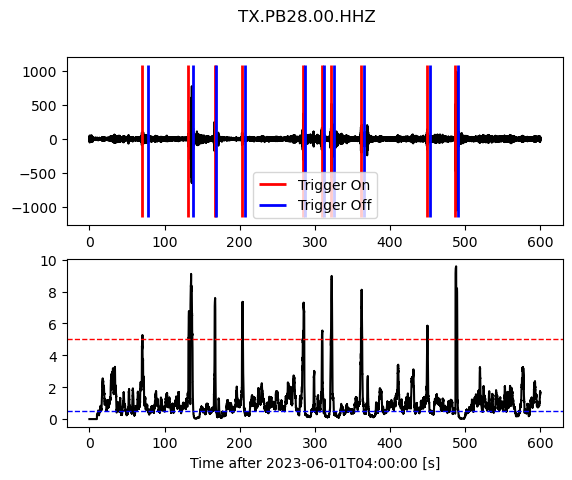

Information for SAC file: /Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.020000.SAC
TX.PB28.00.HHZ | 2023-06-01T04:10:00.000000Z - 2023-06-01T04:20:00.000000Z | 100.0 Hz, 60001 samples
Number of triggers detected: 3


<Figure size 1200x600 with 0 Axes>

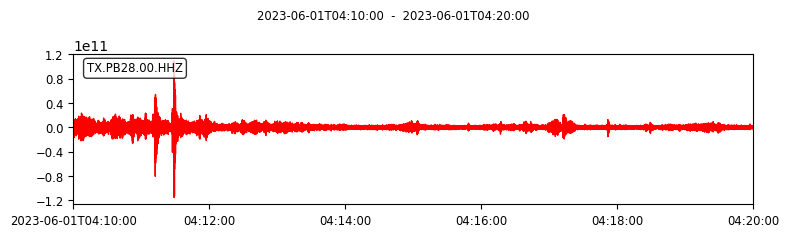

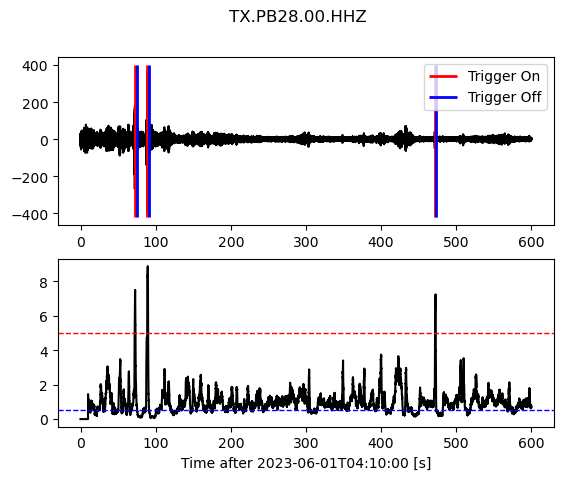

Information for SAC file: /Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.020000.SAC
TX.PB28.00.HHZ | 2023-06-01T04:20:00.000000Z - 2023-06-01T04:30:00.000000Z | 100.0 Hz, 60001 samples
Number of triggers detected: 11


<Figure size 1200x600 with 0 Axes>

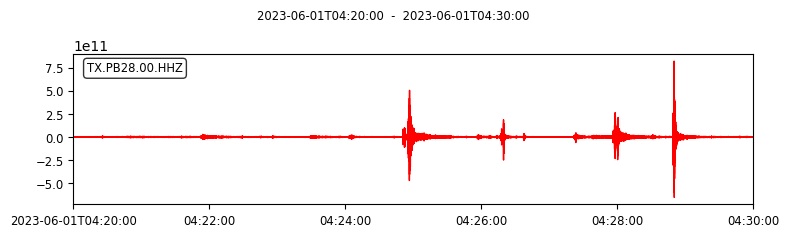

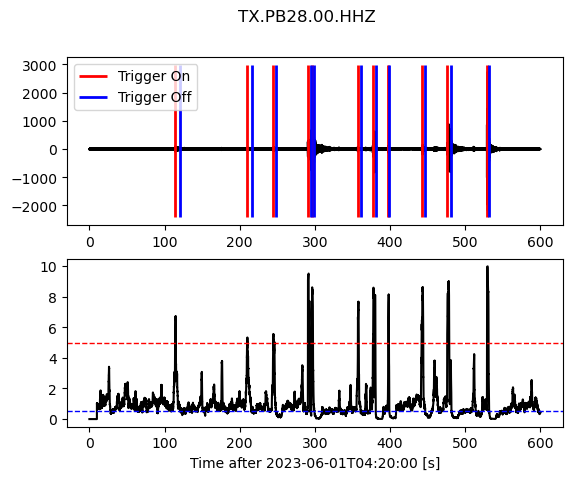

Information for SAC file: /Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.020000.SAC
TX.PB28.00.HHZ | 2023-06-01T04:30:00.000000Z - 2023-06-01T04:40:00.000000Z | 100.0 Hz, 60001 samples
Number of triggers detected: 10


<Figure size 1200x600 with 0 Axes>

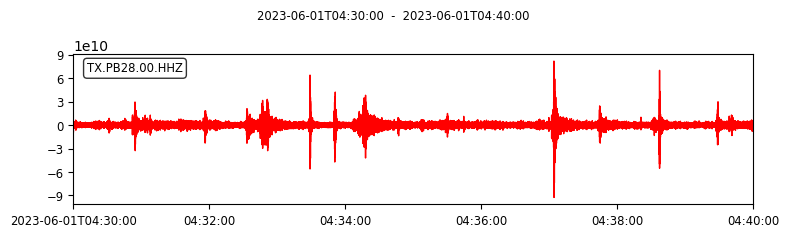

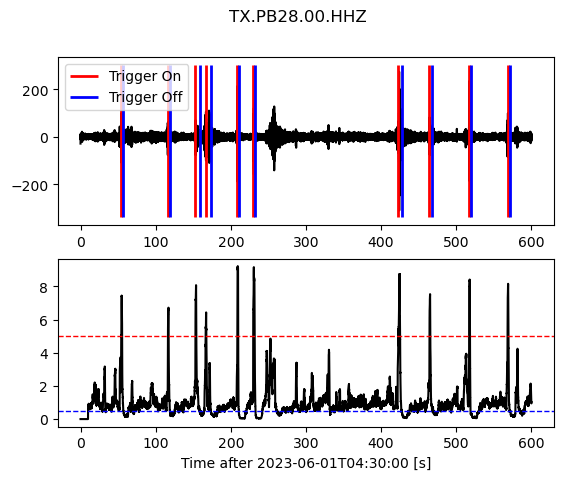

Information for SAC file: /Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.020000.SAC
TX.PB28.00.HHZ | 2023-06-01T04:40:00.000000Z - 2023-06-01T04:50:00.000000Z | 100.0 Hz, 60001 samples
Number of triggers detected: 11


<Figure size 1200x600 with 0 Axes>

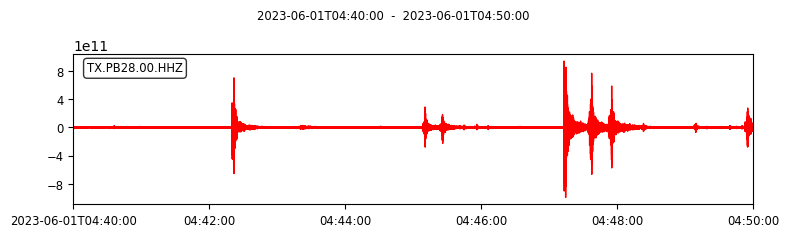

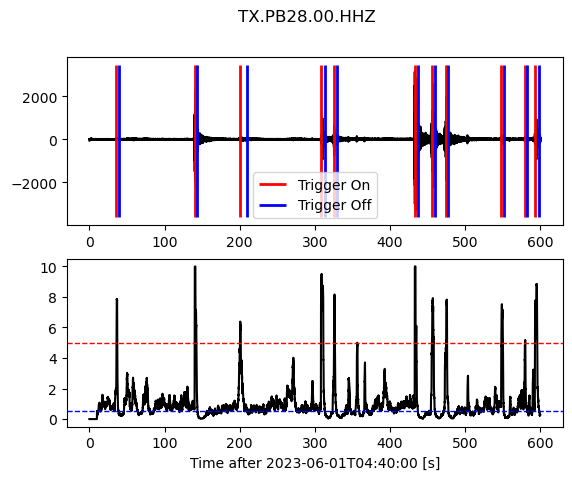

Information for SAC file: /Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.020000.SAC
TX.PB28.00.HHZ | 2023-06-01T04:50:00.000000Z - 2023-06-01T05:00:00.000000Z | 100.0 Hz, 60001 samples
Number of triggers detected: 9


<Figure size 1200x600 with 0 Axes>

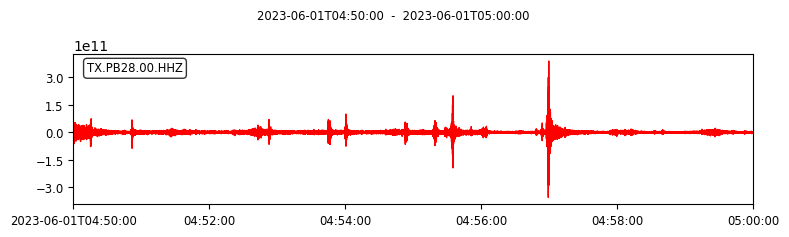

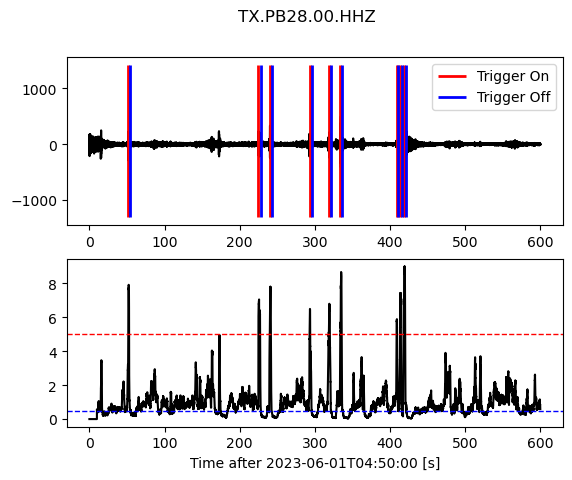

In [113]:
import obspy
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.signal.filter import highpass
from obspy.signal.trigger import classic_sta_lta, trigger_onset

# Load the SAC file
sac_file = "/Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.020000.SAC"
stream = obspy.read(sac_file)

# Set the start time and end time for the overall time range
overall_start_time = UTCDateTime("2023-06-01T00:00:00.000000")
overall_end_time = UTCDateTime("2023-06-01T05:00:00.000000")

# Set the interval duration (10 minutes)
interval_duration = 10 * 60  # 10 minutes in seconds

# Iterate over intervals and plot seismic data
current_start_time = overall_start_time
while current_start_time < overall_end_time:
    current_end_time = current_start_time + interval_duration

    # Trim the data within the specified time range
    trace = stream[0].copy().trim(starttime=current_start_time, endtime=current_end_time)

    # Print basic information about the seismic trace
    print(f"Information for SAC file: {sac_file}")
    print(trace)

    # Apply high-pass filter at 5 Hz to each trace in the stream
    for tr in [trace]:
        tr.data = highpass(tr.data, freq=5, df=tr.stats.sampling_rate, corners=2, zerophase=True)

    # Earthquake detection on the high-pass filtered data
    cft = classic_sta_lta(trace.data, int(1 * trace.stats.sampling_rate), int(10 * trace.stats.sampling_rate))

    # Set trigger levels
    onset_trigger = 5
    end_trigger = 0.5

    # Get trigger onsets
    onset_times = trigger_onset(cft, onset_trigger, end_trigger)

    # Print the count of triggers
    print(f"Number of triggers detected: {len(onset_times)}")
    plt.figure(figsize=(12, 6))

    # Plot the high-pass filtered seismic trace
    #plt.subplot(2, 1, 1)
    trace.plot(title=f"High-pass Filtered Seismic Trace - {sac_file}", color='red', number_of_ticks=5)

    # Plot the earthquake detection on the high-pass filtered data
    #plt.subplot(2, 1, 2)
    plot_trigger(trace, cft, onset_trigger, end_trigger)

    # Show the plots for the current interval
    plt.show()

    # Move to the next interval
    current_start_time = current_end_time


In [115]:
import os
from obspy import read
from datetime import datetime, timedelta
import requests
from io import BytesIO
import zipfile

# URL for seismic waveform data in SAC.zip format
base_url = "http://service.iris.edu/fdsnws/dataselect/1/query"

# Specify the network, station, channel, format, and the desired time range
network = "TX"
station = "PB28"
channel = "HHZ"
format_type = "sac.zip"
start_time = datetime(2023, 6, 1, 0, 0, 0)
end_time = datetime(2023, 6, 2, 0, 0, 0)

# Format start and end times in the required string format
start_time_str = start_time.strftime("%Y-%m-%dT%H:%M:%S")
end_time_str = end_time.strftime("%Y-%m-%dT%H:%M:%S")

# Specify the directory on the desktop
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop', 'seismic_data')

# Create the directory if it doesn't exist
os.makedirs(desktop_path, exist_ok=True)

# Construct the parameters for the request
params = {
    'net': network,
    'sta': station,
    'cha': channel,
    'format': format_type,
    'starttime': start_time_str,
    'endtime': end_time_str,
}

# Send HTTP request to get the SAC.zip file
response = requests.get(base_url, params=params)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Unzip the content directly without saving the intermediate ZIP file
    with zipfile.ZipFile(BytesIO(response.content), 'r') as zip_ref:
        zip_ref.extractall(desktop_path)

    print(f"Downloaded and extracted files for the day")

else:
    # Print an error message if the request was not successful
    print(f"Failed to retrieve data for the day. Status code: {response.status_code}")


Downloaded and extracted files for the day


Information for SAC file: /Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.000000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T00:00:00.000000Z - 2023-06-02T00:00:00.000000Z | 100.0 Hz, 8640001 samples
2023-06-01T00:00:00.000000Z 2023-06-02T00:00:00.000000Z
Information for SAC file: /Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.000000.SAC
1 Trace(s) in Stream:
TX.PB28.00.HHZ | 2023-06-01T00:00:00.000000Z - 2023-06-02T00:00:00.000000Z | 100.0 Hz, 8640001 samples
Number of triggers detected: 434


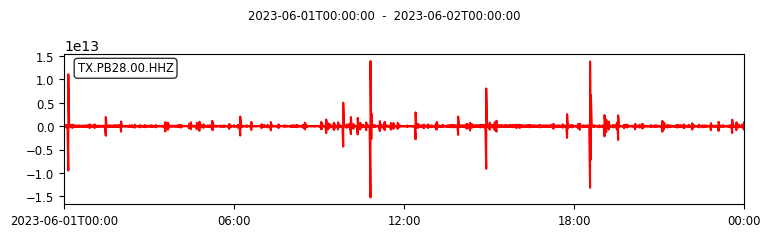

/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/site-packages/obspy/signal/trigger.py:583: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.draw()
/Users/magarciafer/anaconda3/envs/myenv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


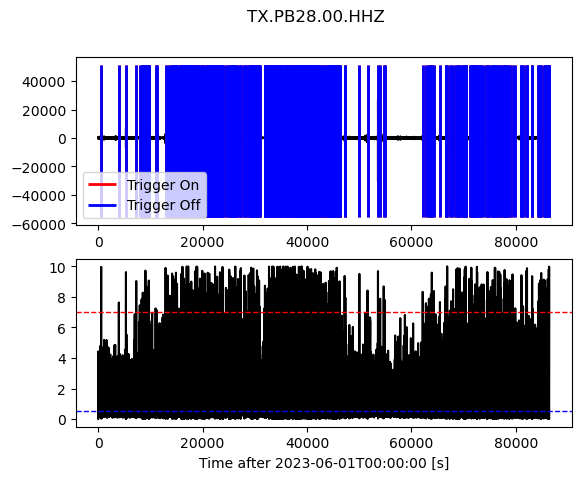

In [118]:
import obspy
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.signal.filter import highpass
from obspy.signal.trigger import classic_sta_lta, trigger_onset

# Load the SAC file
sac_file = "/Users/magarciafer/Desktop/seismic_data/TX.PB28.00.HHZ.M.2023.152.000000.SAC"
stream = obspy.read(sac_file)
print(f"Information for SAC file: {sac_file}")
print(stream)

# Extract relevant information
trace = stream[0]
start_time = UTCDateTime("2023-06-01T00:00:00.000000")
end_time = UTCDateTime("2023-06-02T00:00:0.000000")

# Trim the data within the specified time range
trace.trim(starttime=start_time, endtime=end_time)
print(start_time, end_time)

# Print basic information about the seismic trace
print(f"Information for SAC file: {sac_file}")
print(stream)

# Apply high-pass filter at 5 Hz to each trace in the stream
for tr in stream:
    tr.data = highpass(tr.data, freq=5, df=tr.stats.sampling_rate, corners=2, zerophase=True)

# Earthquake detection on the high-pass filtered data
cft = classic_sta_lta(trace.data, int(1 * trace.stats.sampling_rate), int(10 * trace.stats.sampling_rate))

# Set trigger levels
onset_trigger = 7
end_trigger = 0.5

# Get trigger onsets
onset_times = trigger_onset(cft, onset_trigger, end_trigger)

# Print the count of triggers
print(f"Number of triggers detected: {len(onset_times)}")

# Plot the high-pass filtered seismic trace
trace.plot(title=f"High-pass Filtered Seismic Trace - {sac_file}", color='red', number_of_ticks=5)

# Earthquake detection on the high-pass filtered data
cft = classic_sta_lta(trace.data, int(1 * trace.stats.sampling_rate), int(10 * trace.stats.sampling_rate))
plot_trigger(trace, cft, onset_trigger, end_trigger)

# Show the plots
plt.show()

# Show the plots
plt.show()